In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2

In [ ]:
# Define the paths to your image folders
train = './train'
val = './val'

In [ ]:
# Set the path to the folder containing the 'train' folder
data_dir = train
# Set the image size
img_size = (32, 32)
# Create empty lists for the images and labels
images = []
labels = []
# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir, str(label))
    # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
           # Load the image and resize it to the desired size
           img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
           img = cv2.resize(img, img_size)
           # Append the image and label to the lists
           images.append(img)
           labels.append(label)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)

In [ ]:
# Set the path to the folder containing the 'val' folder
data_dir_val = val
# Set the image size
img_size_val = (32, 32)
# Create empty lists for the images and labels
images_val = []
labels_val = []
# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir_val,str(label))
    # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
            # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size_val)
            # Append the image and label to the lists
            images_val.append(img)
            labels_val.append(label)

# Convert the lists to NumPy arrays
images_val = np.array(images_val)
labels_val = np.array(labels_val)
# Save the arrays in NumPy format
np.save('x_test.npy', images_val)
np.save('y_test.npy', labels_val)

In [ ]:
# Load the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')


1000
178
(1000, 32, 32)
(178, 32, 32)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

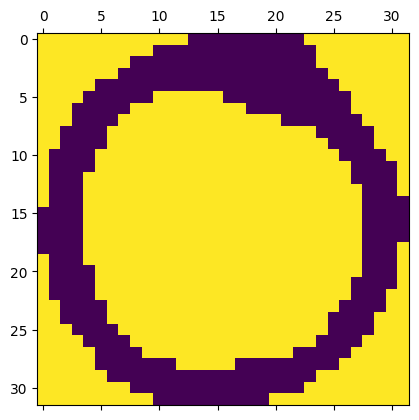

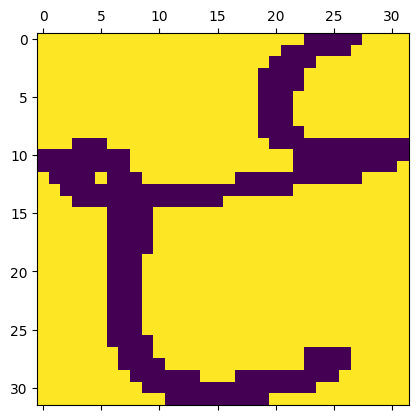

In [ ]:
# test the images are loaded correctly
print(len(x_train))
print(len(x_test))
x_train[0].shape
x_train[0]
plt.matshow(x_train[0])
plt.matshow(x_train[999])
print(x_train.shape)
print(x_test.shape)
y_train

In [ ]:
# flatten the dataset i.e, change 2D to 1D
x_rail_flat = x_train.reshape(len(x_train),32*32)
x_test = x_test.reshape(len(x_test),32*32)
print(x_rail_flat.shape)
print(x_test.shape)
x_rail_flat[0]


(1000, 1024)
(178, 1024)


array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [ ]:
# creating a simple nn
# create a dense layer where every input is connected to every other output, the number of inputs are 1000, outputs are 10
# activation function is sigmoid
model = keras.Sequential([
 keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')
])
# compile the nn
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# train the model
# 5 iterations done here
model.fit(x_rail_flat, y_train,epochs= 5)


Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 140.2424 - accuracy: 0.3940
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 21.6713 - accuracy: 0.7990
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 11.9308 - accuracy: 0.8720
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 10.7066 - accuracy: 0.9000
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 5.7951 - accuracy: 0.9390


In [ ]:
# creating a simple nn
# create a dense layer where every input is connected to every other output, the number of inputs are 1000, outputs are 10
# activation function is sigmoid
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')
    ])
# compile the nn
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
# train the model
# some 10 iterations done here
model.fit(x_train, y_train,epochs= 10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 1s 8ms/step - loss: 133.3249 - accuracy: 0.4080 - val_loss: 44.2883 - val_accuracy: 0.6629
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 26.4286 - accuracy: 0.7890 - val_loss: 31.1247 - val_accuracy: 0.7472
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 13.9124 - accuracy: 0.8680 - val_loss: 27.5864 - val_accuracy: 0.7416
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 12.3741 - accuracy: 0.8920 - val_loss: 11.0762 - val_accuracy: 0.8652
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 6.8699 - accuracy: 0.9330 - val_loss: 9.8917 - val_accuracy: 0.8876
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 4.0651 - accuracy: 0.9420 - val_loss: 15.4367 - val_accuracy: 0.8315
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 6.2850 - accuracy: 0.9340 - val_loss: 32.0129 - val_accuracy: 0.8258
Epoch 8/1

In [ ]:
# Observation : we see a better accuracy from the 2nd iteration

In [ ]:
# now scale and try to check the accuracy, divide dataset by 255
x_train_t = x_train/255
x_test_scaled = x_test/255
model.fit(x_train_t, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 0s 8ms/step - loss: 0.6780 - accuracy: 0.9640 - val_loss: 0.9198 - val_accuracy: 0.8708
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.9670 - val_loss: 0.9005 - val_accuracy: 0.8933
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6560 - accuracy: 0.9750 - val_loss: 0.8850 - val_accuracy: 0.9101
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6446 - accuracy: 0.9820 - val_loss: 0.8746 - val_accuracy: 0.9101
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6360 - accuracy: 0.9840 - val_loss: 0.8663 - val_accuracy: 0.9045
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6291 - accuracy: 0.9900 - val_loss: 0.8600 - val_accuracy: 0.9045
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.9910 - val_loss: 0.8544 - val_accuracy: 0.9101
Epoch 8/10
32/32 [==

In [ ]:
# Observation : we got better result for all iterations on scaling the training dataset

In [ ]:
# evaluate test dataset
model.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.8375 - accuracy: 0.9045


[0.837472140789032, 0.9044944047927856]

In [ ]:
# here we can see there are some errors
# we need to modify our nn, we add some layers in the above model and different activation function

In [ ]:
# in 1st Dense layer,the input is 32 x 32 = 1024 neurons, which will give 10 output(numbers from 0 to 9)
# 2nd Dense layer,the input is 10 neurons from above layers output
# we can add more layers for accuracy
model2 = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])
# compile the nn
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
# train the model
# some 10 iterations done here
history = model2.fit(x_train_t, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 1s 21ms/step - loss: 1.0068 - accuracy: 0.7290 - val_loss: 0.4261 - val_accuracy: 0.8427
Epoch 2/10
32/32 [==============================] - 1s 17ms/step - loss: 0.1726 - accuracy: 0.9430 - val_loss: 0.2544 - val_accuracy: 0.9101
Epoch 3/10
32/32 [==============================] - 1s 17ms/step - loss: 0.1076 - accuracy: 0.9620 - val_loss: 0.3081 - val_accuracy: 0.9382
Epoch 4/10
32/32 [==============================] - 1s 16ms/step - loss: 0.0700 - accuracy: 0.9810 - val_loss: 0.2386 - val_accuracy: 0.9270
Epoch 5/10
32/32 [==============================] - 0s 16ms/step - loss: 0.0789 - accuracy: 0.9720 - val_loss: 0.3116 - val_accuracy: 0.9326
Epoch 6/10
32/32 [==============================] - 1s 16ms/step - loss: 0.0295 - accuracy: 0.9940 - val_loss: 0.1880 - val_accuracy: 0.9494
Epoch 7/10
32/32 [==============================] - 1s 24ms/step - loss: 0.0162 - accuracy: 0.9980 - val_loss: 0.2264 - val_accuracy: 0.9438
Epoch 8/10
32

In [ ]:
# Observation : due to multiple layers the compiling will take more time to execute
# we also got amazing accuracy than earlier
# evaluate test dataset on modified model
model2.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 7ms/step - loss: 0.1988 - accuracy: 0.9551


[0.19881635904312134, 0.9550561904907227]

In [ ]:
# Earlier we got 0.9213483333587646 now we got 0.9606741666793823 accuracy
# redo the confusion matrix
# build confusion matrix to see how our prediction looks like
# convert to concrete values
y_predicted = model2.predict(x_test_scaled)
y_predicted[0]
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

6/6 [==============================] - 0s 6ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1, 1, 1, 1, 1, 1, 1, 7, 7, 1, 1, 1, 1, 1, 1, 2, 5, 2, 2, 4, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0, 14,  0,  1,  1,  0,  0,  0,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

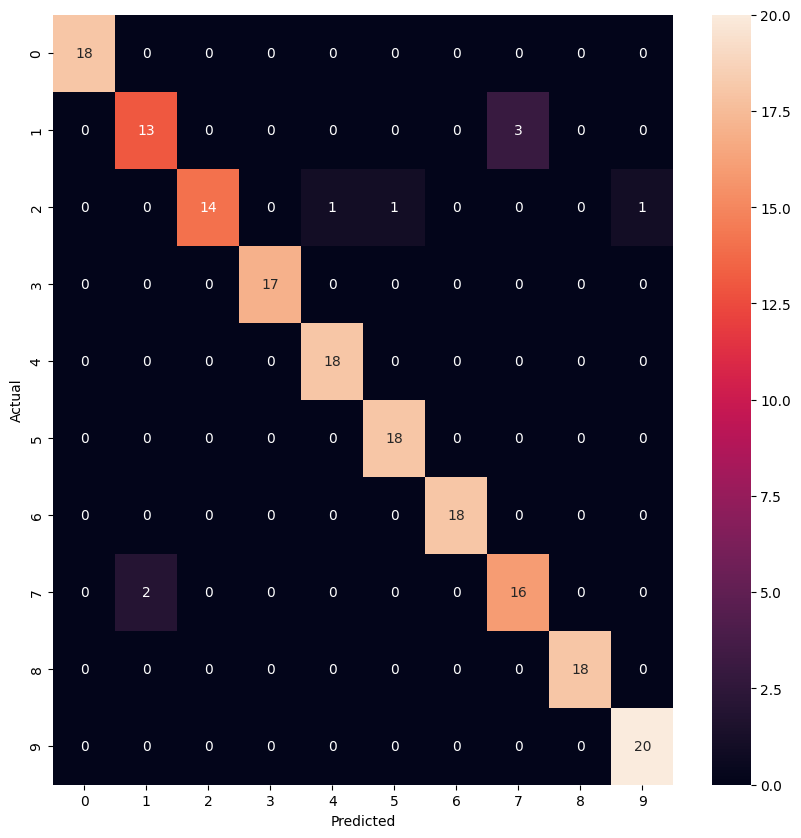

In [ ]:
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')


6/6 [==============================] - 0s 3ms/step - loss: 11.9681 - accuracy: 0.9045
Test accuracy: 0.9044944047927856


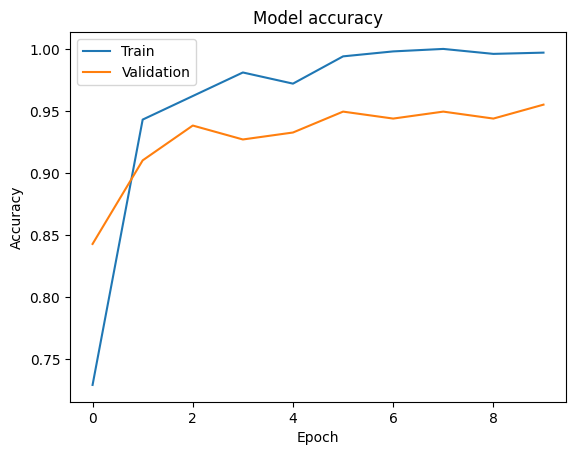

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()